# Homework 4: Text Analysis Using NLTK and Jupyter Notebook
**Objective:**

In this assignment, you will use the Natural Language Toolkit (NLTK) to analyze a corpus of text within a Jupyter Notebook environment. You will preprocess the text, compute word frequencies, generate a word cloud, and classify text using a machine learning classifier.

**Instructions:** 

Complete the following code cells in this Jupyter Notebook. Provide explanations in the markdown cells and comments for your code as necessary.

## Task 1: Importing Libraries and Data

1. Install the required libraries with `pip install wordcloud ntlk`
2. Import the Libraries & Download the necessary files for stop words, punctuation, and the movie_reviews NLTK corpus
3. Load the movie_reviews NLTK corpus. This corpus contains movie reviews categoriezed as Positive (pos) or Negative (neg). More information can be found [here.](https://www.kaggle.com/datasets/nltkdata/movie-review) 
4. Preprocess the text to perform tokenization, remove stop words, and remove all punctuation.

In [42]:
import nltk
from nltk.corpus import stopwords, movie_reviews
from nltk.probability import FreqDist
from nltk.tokenize import word_tokenize
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import string
import random
from nltk.classify import NaiveBayesClassifier
from nltk.classify.util import accuracy

# Download necessary NLTK data
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('movie_reviews')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Erik\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Erik\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package movie_reviews to
[nltk_data]     C:\Users\Erik\AppData\Roaming\nltk_data...
[nltk_data]   Package movie_reviews is already up-to-date!


True

In [59]:
# Your Code here to:
# Load text data from NLTK corpus
stop_words = set(stopwords.words('english'))
punctuation = set(string.punctuation)

def process_text(words):
    cleaned_words = [word for word in words if word.lower() not in stop_words and word not in punctuation]
    return cleaned_words

movie_r = [
    (preprocess_text(movie_reviews.words(fileid)), category)
    for category in movie_reviews.categories()
    for fileid in movie_reviews.fileids(category)
]


## Task 2: Frequency Analysis and Visualization
1. Compute word frequencies using NLTK's FreqDist class.
2. Plot a frequency distribution of the 5 most frequently appearing words using FreqDist's plot method.
3. Generate and display a word cloud based on the word frequencies.

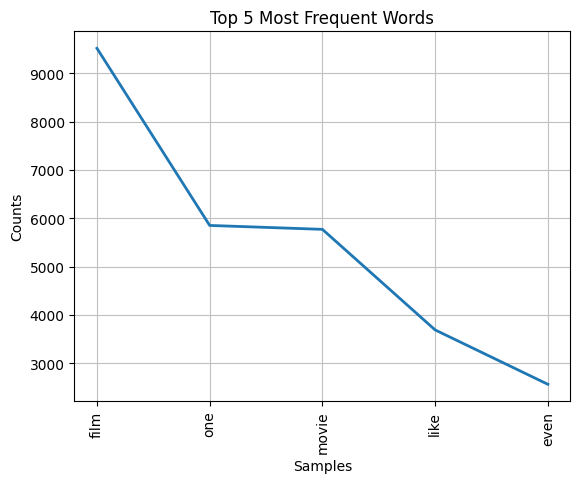

<Axes: title={'center': 'Top 5 Most Frequent Words'}, xlabel='Samples', ylabel='Counts'>

In [57]:
# Compute word frequencies

# Extract words from the preprocessed documents
all_words = [word for words, category in documents for word in words]

# Compute word frequencies
freq_dist = FreqDist(all_words)

# Plot the 5 most frequent words
freq_dist.plot(5, title='Top 5 Most Frequent Words')

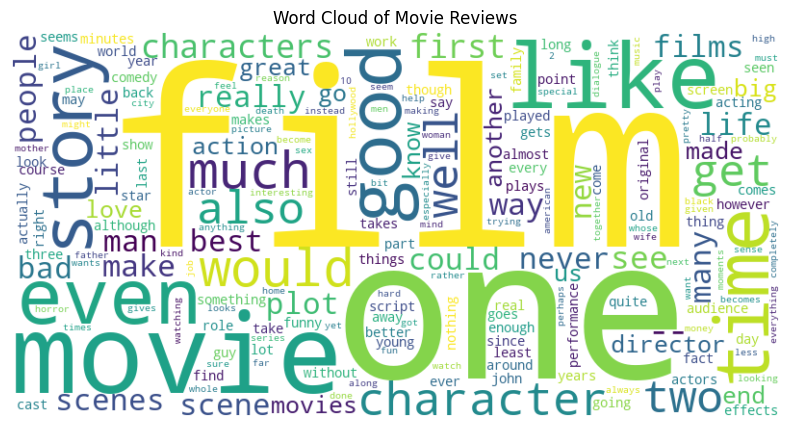

In [58]:
# Generate and display word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(freq_dist)
# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Movie Reviews')
plt.show()


## Task 3: Text Classification

1. Train a Naive Bayes classifier using the NLTK movie reviews dataset. Use 100 samples for testing, and 100 for training.
2. Evaluate the classifier's accuracy. Print the result of the accuracy test. 
3. Classify two given blocks of "unknown" text using the trained classifier.
4. Find a positive or negative movie review on the internet (from a source other than IMDB) and submit it to your classifier. Was the result accurate?

In [70]:
# Define a Feature extractor function to buid the dictionary
def movie_r_features(document):
    features = {word: True for word in document}
    return features

# Extract features from reviews
feature_sets = [(movie_r_features(words), category) for (words, category) in documents]

# Split into training and testing sets
train_set, test_set = feature_sets[:100], feature_sets[100:200]

# Train Naive Bayes classifier
classifier = NaiveBayesClassifier.train(train_set)

# Evaluate the classifier's accuracy
accuracy_result = accuracy(classifier, test_set)
print(f'Accuracy: {accuracy_result:.2f}')

# Function to classify text
def classify_text(text):
    words = word_tokenize(text)
    cleaned_words = preprocess_text(words)
    features = movie_r_features(cleaned_words)
    return classifier.classify(features)

# Load movie reviews dataset
movie_r = [
    (preprocess_text(movie_reviews.words(fileid)), category)
    for category in movie_reviews.categories()
    for fileid in movie_reviews.fileids(category)
]

# Shuffle the reviews
random.shuffle(movie_r)

# Evaluate classifier


Accuracy: 1.00


In [73]:
# Classify given "unknown" review texts
unknown_text1 = """
    I found the movie to be a masterpiece. The acting was superb and the storyline was compelling.
    Every scene was crafted with perfection and the direction was top-notch. It's one of the best
    movies I have ever seen. I would totally go and see it again!
"""
unknown_text2 = """
    This movie stinks. The acting was horrible! It's amazing how bad the sequels are nowadays. A Waste of time and money.
"""
#Fill in the code to tokenize, extract features and predict the category of the texts

predicted_category1 = classify_text(unknown_text1)
predicted_category2 = classify_text(unknown_text2)

# Display the results
print(f"The predicted category for the unknown text1 is: {predicted_category1}")
print(f"The predicted category for the unknown text2 is: {predicted_category2}")


The predicted category for the unknown text1 is: neg
The predicted category for the unknown text2 is: neg


In [76]:
# Using the code above as a framework, classify an "unknown" review from the internet

unknown_review_internet = """
    The film was a rollercoaster of emotions. The characters were realistic and the plot was engaging.
    I couldn't tear my eyes away from the screen. Highly recommended!
"""

# Classify the unknown review from the internet
predicted_category_internet = classify_text(unknown_review_internet)

# Display the result for the internet review
print(f"The predicted category for text I found on the internet is: {predicted_category_internet}")

print(f'Accuracy: {accuracy_result:.2f}')
#Display your results using a print fstring using something similar to this:
#print(f"The predicted category for text I found on the internet is: {predicted_category}")


The predicted category for text I found on the internet is: neg
Accuracy: 1.00


**Did the model correctly categorize the review? Describe the accuracy of your test below:**


## Congrats! You've reached the end of Homework 4!
Please turn in your notebook to Canvas to receive credit. 